<a target="_blank" href="https://colab.research.google.com/github/mursabogdan/C4DHI-Complex-Networks/blob/main/05-model-network.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [10]:
!mkdir datasets
!curl -sL https://raw.githubusercontent.com/mursabogdan/C4DHI-Complex-Networks/main/datasets/clusters.csv -o datasets/clusters.csv
!curl -sL https://raw.githubusercontent.com/mursabogdan/C4DHI-Complex-Networks/main/datasets/seeds.csv -o datasets/seeds.csv

mkdir: cannot create directory ‘datasets’: File exists


In [11]:
from sklearn.cluster import KMeans

import pandas as pd

seeds_df = pd.read_csv('datasets/seeds.csv')

# extract the grain varieties from the dataframe
varieties = list(seeds_df['grain_variety'])
del seeds_df['grain_variety']

samples = seeds_df.values
model = KMeans(n_clusters=3)
labels = model.fit_predict(samples)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
# Group points by cluster
clusters = {}
for label, point in zip(labels, samples):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(point)

In [13]:
from scipy.spatial.distance import cosine
import networkx as nx
import matplotlib.pyplot as plt

node_distance_distribution = list()
for cluster, points in clusters.items():
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            node_distance_distribution.append(cosine(points[i], points[j]))

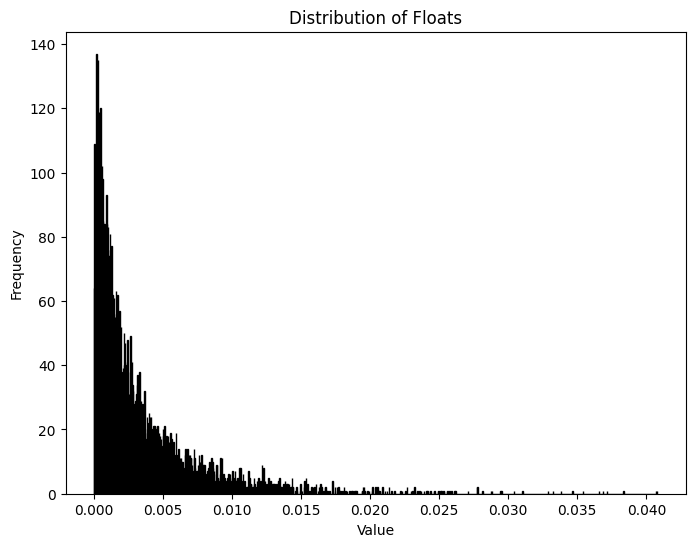

In [14]:
plt.figure(figsize=(8, 6))  # Set the figure size
plt.hist(node_distance_distribution, bins=1000, color='blue', edgecolor='black')  # Plot histogram
plt.title('Distribution of Floats')  # Set title
plt.xlabel('Value')  # Set x-axis label
plt.ylabel('Frequency')  # Set y-axis label

# Show the plot
plt.show()

77 1753


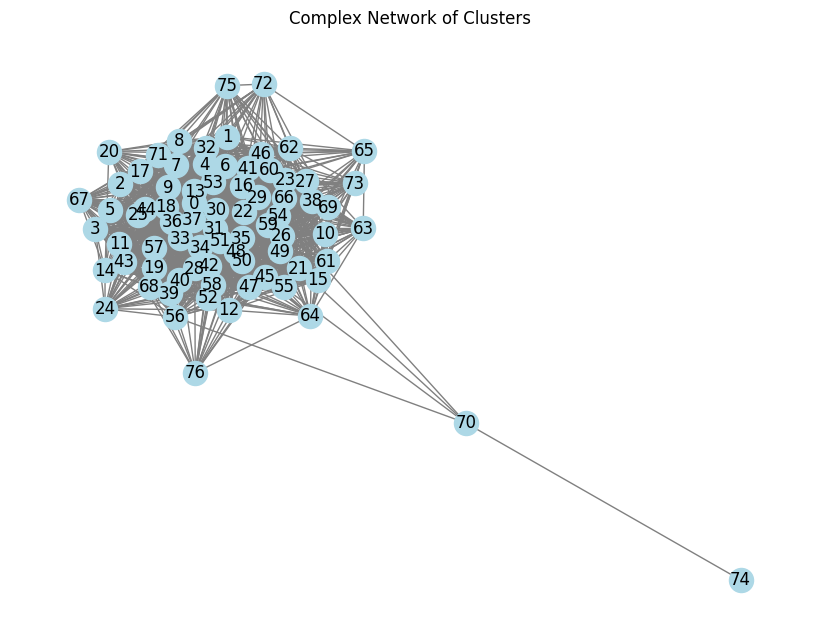

In [16]:
# Distance threshold
threshold = 0.001

# Create a graph
G = nx.Graph()

for cluster, points in clusters.items():
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            if cosine(points[i], points[j]) < threshold:
                G.add_edge(i, j)

for cluster_points in clusters.values():
    for i, point in enumerate(cluster_points):
        if point not in G:
            G.add_node(i)
print(len(G.nodes()), len(G.edges()))
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title('Complex Network of Clusters')
plt.show()


nx.write_graphml(G, "exported_graph.graphml")